# Rachel Ward

## DAV 5400 - Project 2



## Part 1: Introduction

For this project, I will be looking at the leading causes of death in New York City ("NYC"). The dataset comes from [NYC Open Data](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam) and looks at the leading causes of death by sex and ethnicity in the city of New York from 2007 to 2014. The data was provided by the Department of Health and Mental Hygiene. Within the dataset, "rates based on small numbers as well as aggregate counts less than 5 have been suppressed." This is important to note because it means that the dataset does not list every single cause of death, but has already been filtered to list only leading causes of death.

### Research Question

**What is the leading cause of death in NYC and is this answer different depending on sex or race?**

Understanding the answer to this question could be extremely beneficial to someone who works in Public Health or in Health Education as they could provided targeted resources and education based on the results. For example, if the leading cause of death for women was breast cancer, a public health official may consider applying for grants to increase access to breast cancer screenings and education on preventative care. 


## Part 2: Data Summary

As mentioned briefly above, the dataset being analyzed below comes from [NYC Open Data.](https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam)  There are 1,094 rows of data. Each row contains 7 columns of data:

1. Year
    * data type: integer
2. Leading Cause of Death
    * data type: string
3. Sex
    * data type: string
4. Race Ethnicity
    * data type: string
5. Deaths
    * data type: integer
6. Death Rate
    * data type: float
7. Age Adjusted Death Rate
    * data type: float

## Part 3: Exploratory Data Analysis ("EDA")

For this part of the analysis I will be providing summary statistics for each of the attributes, investigating if there are any NULL values or outliers which could affect my analysis, and providing graphical analyses for each attribute using both Matplotlib and Seaborn. 

First I will read in the file, and import the Pandas, Numpy, Matplotlib, and Seaborn libraries.

In [46]:
#first import pandas
import pandas as pd

#also import numpy just in case
import numpy as np

# load the pyplot function from the matplotlib library so that I can create visualizations
import matplotlib.pyplot as plt

#import seaborn as another visualization tool
import seaborn as sns

#now read in the file using pandas read csv function and create a pandas data frame from it
filename = "https://raw.githubusercontent.com/rachelward617/DAV-5400/master/New_York_City_Leading_Causes_of_Death%20(1).csv"
nycdeaths = pd.read_csv(filename)

#Use the head function to ensure the data loaded properly
nycdeaths.head()


,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2014,All Other Causes,Male,Hispanic,1195,100.1,143.3
1,2014,Malignant Neoplasms (Cancer: C00-C97),Male,Asian and Pacific Islander,657,114.5,129.5
2,2014,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Asian and Pacific Islander,554,96.5,118.5
3,2014,Influenza (Flu) and Pneumonia (J09-J18),Male,Asian and Pacific Islander,105,18.3,25
4,2014,Chronic Lower Respiratory Diseases (J40-J47),Male,Asian and Pacific Islander,95,16.6,22.9


Now that the data has loaded correctly, I will check to see if there are any NULL values present which could impact my analysis.

In [2]:
#See if there are any null values present as this could skew the results 
nycdeaths.isnull().sum()

Year                       0
Leading Cause              0
Sex                        0
Race Ethnicity             0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64

Since there are no null values present, I will next check to ensure that all of the data types are as I would expect.


In [47]:
#check to see if all data types are what I expected using dtypes function
nycdeaths.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

I was anticipating that deaths would be an integer, while death rate and age adjusted death rate would be floats. Since this is not the case I will do some preliminary exploratory analysis and data transformation if necessary.

In [48]:
#get summary statistics on deaths
nycdeaths['Deaths'].describe()

count     1094
unique     465
top          .
freq       138
Name: Deaths, dtype: object

This shows me that there are values of "." for deaths which I will replace with zeroes so that I can proceed with my analysis.

In [81]:
#use numpy's where function to replace "." with 0 in the deaths column.
nycdeaths['Deaths'] = np.where(nycdeaths['Deaths'] == ".", 0, nycdeaths['Deaths'])

#further ensure that Deaths is an integer by changing the type of the column
nycdeaths['Deaths'] = nycdeaths['Deaths'].astype(int)

#check for accuracy
nycdeaths['Deaths'].describe()

count     956.000000
mean      444.558577
std       880.107843
min         5.000000
25%        36.000000
50%       148.500000
75%       307.250000
max      7050.000000
Name: Deaths, dtype: float64

Now I will do the same process for Death Rates.

In [52]:
nycdeaths['Death Rate'].describe()

count     1094
unique     442
top          .
freq       386
Name: Death Rate, dtype: object

In [53]:
#use numpy's where function to replace the "." where present in the Death Rate column with a 0 to convert the column to a float.
nycdeaths['Death Rate'] = np.where(nycdeaths['Death Rate'] == ".", 0, nycdeaths['Death Rate'])

#check if Death Rates is now a float
nycdeaths['Death Rate'].describe()

count     1094
unique     442
top          0
freq       386
Name: Death Rate, dtype: int64

In [54]:
#Death Rate is now an integer but it should be a float so I will use pandas astype function to convert the column to a float type
nycdeaths['Death Rate'] = nycdeaths['Death Rate'].astype(float)

#double check that this worked
nycdeaths['Death Rate'].describe()

count    1094.000000
mean       34.583821
std        66.637904
min         0.000000
25%         0.000000
50%        11.050000
75%        25.900000
max       491.400000
Name: Death Rate, dtype: float64

Now that Death and Death Rate are in the proper data type, I will follow the same steps to transform Age Adjusted Death Rate to a float type.

In [55]:
#get a description to check for the "." problem that was present above
nycdeaths['Age Adjusted Death Rate'].describe()

count     1094
unique     427
top          .
freq       386
Name: Age Adjusted Death Rate, dtype: object

In [56]:
#use numpy's where function to replace the "." where present in the Age Adjusted Death Rate column with a 0 to convert the column to a float.
nycdeaths['Age Adjusted Death Rate'] = np.where(nycdeaths['Age Adjusted Death Rate'] == ".", 0, nycdeaths['Age Adjusted Death Rate'])

#check if Death Rates is now a float
nycdeaths['Age Adjusted Death Rate'].describe()

count     1094
unique     427
top          0
freq       386
Name: Age Adjusted Death Rate, dtype: int64

In [57]:
#Age Adjusted Death Rate is now an integer but it should be a float so I will use pandas astype function to convert the column to a float type
nycdeaths['Age Adjusted Death Rate'] = nycdeaths['Age Adjusted Death Rate'].astype(float)

#double check that this worked
nycdeaths['Age Adjusted Death Rate'].describe()

count    1094.000000
mean       34.598995
std        61.170816
min         0.000000
25%         0.000000
50%        10.450000
75%        25.225000
max       350.700000
Name: Age Adjusted Death Rate, dtype: float64

Because there were three variables that had the same issue, I want to check and see if there are rows where the values for all three of the columns studied immediately prior (Deaths, Death Rate, and Age Adjusted Death Rate) are 0. If there are, I will exclude those rows from the analysis because they contain no numeric data. Including any rows that have no numeric data will likely skew any count of categorical variables. 

In [61]:
#create a new data frame that contains only rows with 0 values for all three columns
check = nycdeaths[(nycdeaths['Deaths'] == 0) & (nycdeaths['Death Rate'] == 0) & (nycdeaths['Age Adjusted Death Rate']==0)]

#count how many rows there are
check.count()


Year                       138
Leading Cause              138
Sex                        138
Race Ethnicity             138
Deaths                     138
Death Rate                 138
Age Adjusted Death Rate    138
dtype: int64

Since 138 out of 1,094 total rows is over 10% of the total dataset, the rows with all zeros could skew my results. I will therefore remove them now.

In [63]:
#get the index values for the rows gathered above
check = nycdeaths[(nycdeaths['Deaths'] == 0) & (nycdeaths['Death Rate'] == 0) & (nycdeaths['Age Adjusted Death Rate']==0)].index

#use the drop function to drop the rows based on the indexes gathered above
nycdeaths.drop(check, inplace=True)

#double check that I now have 956 rows (1094 - 138)
nycdeaths.count()

Year                       956
Leading Cause              956
Sex                        956
Race Ethnicity             956
Deaths                     956
Death Rate                 956
Age Adjusted Death Rate    956
dtype: int64

## Part 2 Revision:

After performing basic exploratory data analysis, I determined that 138 rows needed to be removed. Therefore for the remainder of the analysis, there will be only 956 rows in the dataset.

### Exploratory Data Analysis - Year
Now that I have a cleaner data set, I will begin my exploratory data analysis on the attributes. 
First I will get summary statistics on the attribute Year. Then, since Year is a categorical/ordinal variable, I will generate bar plots using both Matplotlib and Seaborn.

In [64]:
#provide summary statistics for the attribute year
nycdeaths['Year'].describe()

count     956.000000
mean     2010.592050
std         2.309303
min      2007.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2014.000000
Name: Year, dtype: float64

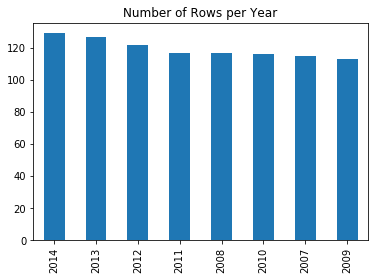

In [95]:
#Use matplotlib to plot a bar plot of the number of rows per year
yearplot = nycdeaths['Year'].value_counts().plot(kind = 'bar')

#set the title of the bar plot
yearplot.set_title('Number of Rows per Year')

#show the plot
yearplot;

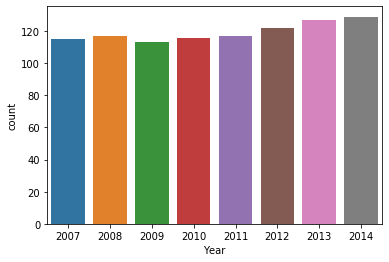

In [66]:
#Now I will create the same bar plot but using Seaborn
#Seaborn has a built in countplot function that creates a bar plot with a count of values so I elected to use that
yearseaplot = sns.countplot(x="Year", data=nycdeaths)

#show the bar/count plot
yearseaplot;

### Exploratory Data Analysis - Year: Results
Based on the above bar plots and summary statistics, the mean year is 2010, the lowest year is 2007, and the highest year is 2014. The distribution is fairly unimodal with no outliers. This is what I would expect because although the causes of death may change over the years, I would expect the number of causes that represent "leading" causes to remain fairly consistent throughout the years which would generate roughly the same number of rows of data for each year. The slight increase starting in 2012 indicates there may be increased variation in leading causes of death or perhaps more data present for different races/genders in more recent years. 

### Exploratory Data Analysis - Leading Cause of Death
Next I will look at the Leading Cause of Death Attribute. Since this is also a categorical variable, I will first look at the summary statistics, and then look at bar plots in both Matplotlib and Seaborn.

In [67]:
#provide summary statistics for the attribute Leading Cause of Death
nycdeaths['Leading Cause'].describe()

count                                       956
unique                                       21
top       Malignant Neoplasms (Cancer: C00-C97)
freq                                         96
Name: Leading Cause, dtype: object

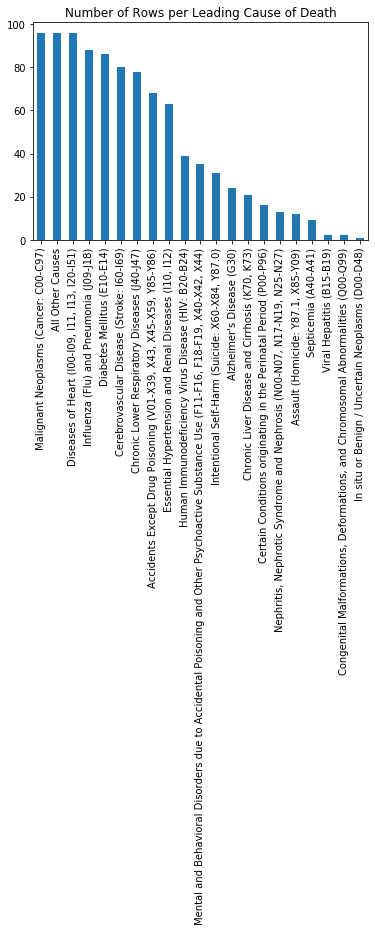

In [96]:
#Use matplotlib to plot a bar plot of the number of rows per leading cause of death
LeadingCausePlot = nycdeaths['Leading Cause'].value_counts().plot(kind = 'bar')

#set the title of the bar plot
LeadingCausePlot.set_title('Number of Rows per Leading Cause of Death')

#show the plot
LeadingCausePlot;

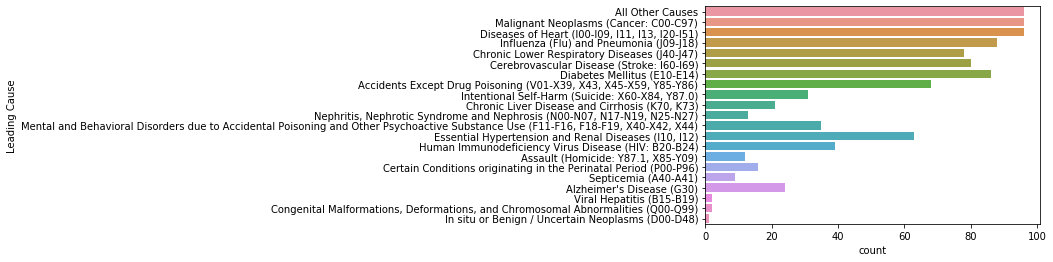

In [69]:
#Now I will create a bar plot for the same data using Seaborn
#Seaborn has a built in countplot function that creates a bar plot with a count of values so I elected to use that
#because the labels are lengthy, I elected to use a horizontal bar plot as it displays the data in a cleaner fashion
Causeseaplot = sns.countplot(y="Leading Cause", data=nycdeaths)

#show the bar/count plot
Causeseaplot;

### Exploratory Data Analysis - Leading Cause of Death: Results

Based on the graphs above and the summary statistics, it appears that there are three leading causes of death that appear most frequently throughout the data set:  
* Diseases of Heart
* Malignant Neoplasms (Cancer)
* All Other Causes 

Since All Other Causes is a catch-all, it is not surprising that it is one of the most frequently appearing leading causes. The frequency of the three causes in the bulleted list above indicates that these three leading causes of death are present for a lot of races and genders, and over many years.

The distribution is skewed to the right, with some causes, for example, Viral Hepatitis and In situ or Benign/Uncertain Neoplasms, appearing very infrequently. The infrequency of these variables indicates that they may only primarily affect certain segments of the population, or that they may be new causes that only appear in a few years. 

### Exploratory Data Analysis - Sex

Next I will look at the attribute sex (male/female). First I will gather summary statistics. Then since the attribute is categorical, I will graph a bar plot using both Matplotlib and Seaborn.

In [70]:
#provide summary statistics for the attribute Sex
nycdeaths['Sex'].describe()

count      956
unique       2
top       Male
freq       493
Name: Sex, dtype: object

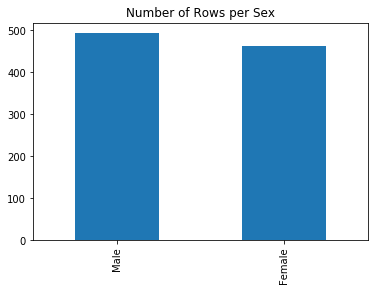

In [94]:
#Use matplotlib to plot a bar plot of the number of rows per sex
GenderPlot = nycdeaths['Sex'].value_counts().plot(kind = 'bar')

#set the title of the bar plot
GenderPlot.set_title('Number of Rows per Sex')

#show the plot
GenderPlot;

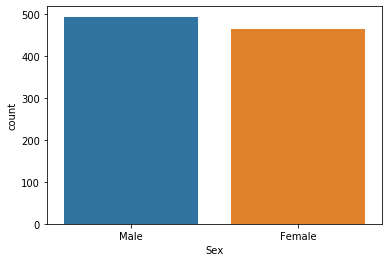

In [72]:
#Now I will create the bar plot for the same data using Seaborn
#Seaborn has a built in countplot function that creates a bar plot with a count of values so I elected to use that
Sexseaplot = sns.countplot(x="Sex", data=nycdeaths)

#show the bar/count plot
Sexseaplot;

### Exploratory Data Analysis - Sex: Results

From the graphs and statistics above, we can see that the distribution is fairly unimodal. The frequency of males is slightly higher indicating there may be more leading causes of death for males than females. Stated differently, it would appear that men in NYC died from a greater variety of causes than women in this time period. 

### Exploratory Data Analysis - Race/Ethnicity

Next I will examine the attribute Race/Ethnicity. First I will look at summary statistics of the attribute. Then I will create bar plots using MatPlotLib and Seaborn as this is a categorical variable.

In [73]:
#provide summary statistics for the attribute Race/Ethnicity
nycdeaths['Race Ethnicity'].describe()

count                    956
unique                     6
top       Black Non-Hispanic
freq                     178
Name: Race Ethnicity, dtype: object

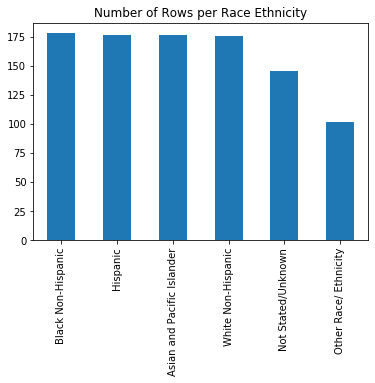

In [97]:
#Use matplotlib to plot a bar plot of the number of rows per Race Ethnicity
RacePlot = nycdeaths['Race Ethnicity'].value_counts().plot(kind = 'bar')

#set the title of the bar plot
RacePlot.set_title('Number of Rows per Race Ethnicity')

#show the plot
RacePlot;

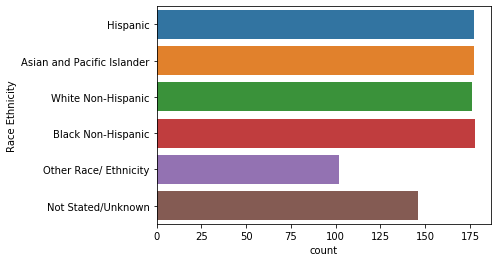

In [75]:
#Next I will create a bar plot for the same data using Seaborn
#Seaborn has a built in countplot function that creates a bar plot with a count of values so I elected to use that
#because the labels are lengthy, I elected to do a horizontal chart
Raceseaplot = sns.countplot(y="Race Ethnicity", data=nycdeaths)

#show the bar/count plot
Raceseaplot;

### Exploratory Data Analysis - Race Ethnicity: Results

If you ignore the Other and Unknown races, then the distribution is fairly unimodal with "Black Non-Hispanic" being the most frequent. The main race categories appear in similar amounts indicating that there are is a fairly even variety of causes that affect each race. Stated differently, there does not appear to be a race which is affected by fewer leading causes of death than the others. 

If you include the other and unknown categories, then the distribution is skewed to the right, with fewer records available for these two categories. This makes sense because I would expect the populations of these categories to be smaller, as most people can be identified as part of one of the races described above (Hispanic, Asian and Pacific Islander, White Non-Hispanic, or Black Non-Hispanic).  

### Exploratory Data Analysis - Deaths

Next I will analyze the attribute Deaths. First I will look at summary statistics of the attribute. Then I will use MatPlotLib and Seaborn to create histograms and boxplots of the distribution since the variable is numeric.

In [82]:
#provide summary statistics for the attribute Deaths
nycdeaths['Deaths'].describe()

count     956.000000
mean      444.558577
std       880.107843
min         5.000000
25%        36.000000
50%       148.500000
75%       307.250000
max      7050.000000
Name: Deaths, dtype: float64

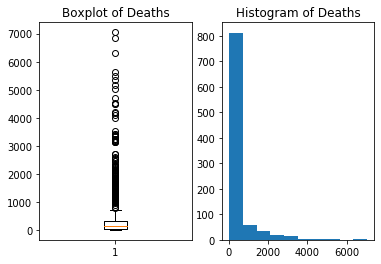

In [98]:
#The below code is repurposed from the DAV 5400 Week 7 Lecture Notes
#side-by-side boxplot and histogram of the Deaths column
data = nycdeaths['Deaths']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot
plt.subplot(121)

#define boxplot as the the type of plot I want to appear
plt.boxplot(data)

#give the plot a title
plt.title('Boxplot of Deaths')

#now define the subplot that will appear on the righthand side of my 1x2
plt.subplot(122)

#define histogram as the type of plot I want to appear
plt.hist(data)

#give the plot a title
plt.title('Histogram of Deaths')

#show results
plt.show()

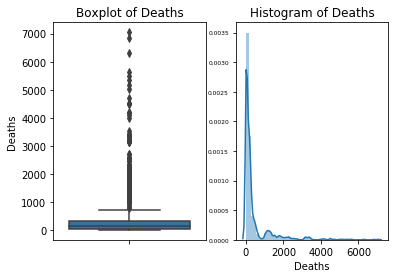

In [138]:
#The code below is repurposed from the DAV 5400 Week 7 Lecture Notes
#I will now create a boxplot and histogram using the same method as above but using Seaborn
#side-by-side boxplot and histogram of the Deaths column using Seaborn
data = nycdeaths['Deaths']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

#define boxplot as the type of plot I want to appear
sns.boxplot(data, orient = 'v');

#give the plot a title
plt.title('Boxplot of Deaths')

#now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

#define histogram as the type of plot I want to appear
sns.distplot(data)

#give the plot a title
plt.title('Histogram of Deaths')

#change the font size of the y ticks to a smaller size so they do not overlap with the other graph
#note that the y ticks are not very informative in this histogram as we are only using it to see the distribution
plt.yticks(fontsize = 6)

#show results
plt.show();

### Exploratory Data Analysis - Deaths: Results
The summary statistics and charts shown above show that the mean number of deaths per leading cause per year per race and per gender is 444. The maximum number of deaths for any leading cause/race/gender/year is 7,050, while the minimum is 5. 

The distribution is skewed right with the mean being higher than the median, and the appearance of many high outliers. Particularly any values over 3,000 could be considered outliers since it is roughly more than 3 standard deviations away from the mean.The boxplots show this well, since the middle 50% of the data is between 36 and 307.

The presence of so many outliers is expected since there are certain groups which have much higher populations than others within NYC. For this reason, it will be important to examine the Death Rate which helps normalize for these fluctuations in population size. 

### Exploratory Data Analysis - Death Rate

Next I will analyze the attribute Death Rate. First I will look at summary statistics of the attribute. Then I will use MatPlotLib and Seaborn to create histograms and boxplots of the distribution since the variable is numeric.

In [86]:
#provide summary statistics for the attribute Death Rate
nycdeaths['Death Rate'].describe()

count    956.000000
mean      39.576046
std       69.889274
min        0.000000
25%        0.000000
50%       13.650000
75%       32.050000
max      491.400000
Name: Death Rate, dtype: float64

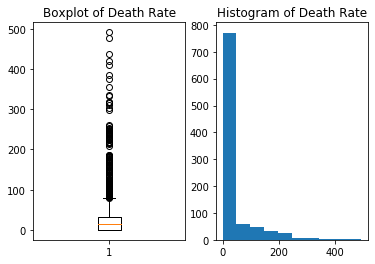

In [101]:
#The below code is repurposed from the DAV 5400 Week 7 Lecture Notes
#side-by-side boxplot and histogram of Death Rate Column using Matplotlib
data = nycdeaths['Death Rate']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot
plt.subplot(121)

#define boxplot as the type of plot I want to appear
plt.boxplot(data)

#give the plot a title
plt.title('Boxplot of Death Rate')

#now define the subplot that will appear on the righthand side of my 1x2
plt.subplot(122)

#define histogram as the type of plot I want to appear
plt.hist(data)

#give the plot a title
plt.title('Histogram of Death Rate')

#show the results
plt.show()

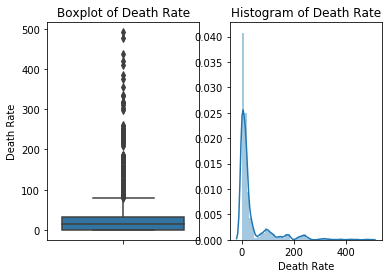

In [102]:
#The below code is repurposed from the DAV 5400 Week 7 Lecture Notes
#side-by-side boxplot and histogram of the Death Rate column using Seaborn
data = nycdeaths['Death Rate']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

#define boxplot as the type of plot I want to appear
sns.boxplot(data, orient = 'v');

#give the plot a title
plt.title('Boxplot of Death Rate')

#now define the subplot that will appear on the righthand side of my 1x2
plt.subplot(122)

#define the type of plot you want to appear as a histogram
sns.distplot(data)

#give the plot a title
plt.title('Histogram of Death Rate')

plt.show();

### Exploratory Data Analysis - Death Rate: Results
The summary statistics and charts above show that the mean is 39.5 with a maximum of 491.4 and a minimum of 0. The distribution is skewed right with the appearance of many outliers, particularly any points over 248 could be considered outliers as they are more than 3 standard deviations above the mean. 

As discussed on the analysis of Deaths, the distribution of Death Rate is much more compact with fewer outliers and a much smaller range. 

### Exploratory Data Analysis - Age Adjusted Death Rate

Next I will analyze the attribute Age Adjusted Death Rate. First I will look at summary statistics of the attribute. Then I will use MatPlotLib and Seaborn to create histograms and boxplots of the distribution since the variable is numeric.


In [89]:
#provide summary statistics for the attribute Age Adjusted Death Rate
nycdeaths['Age Adjusted Death Rate'].describe()

count    956.000000
mean      39.593410
std       63.911076
min        0.000000
25%        0.000000
50%       15.150000
75%       31.350000
max      350.700000
Name: Age Adjusted Death Rate, dtype: float64

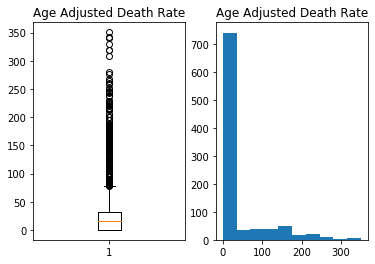

In [103]:
#The below code was repurposed from the DAV 5400 Week 7 Lecture Notes
#side-by-side boxplot and histogram of the Age Adjusted Death Rate using Matplotlib
data = nycdeaths['Age Adjusted Death Rate']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot
plt.subplot(121)

#define boxplot as the type of plot I want to appear
plt.boxplot(data)

#give the plot a title
plt.title('Age Adjusted Death Rate')

#now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

#define histogram as the type of plot I want to appear
plt.hist(data)

#give the plot a title
plt.title('Age Adjusted Death Rate')

plt.show()

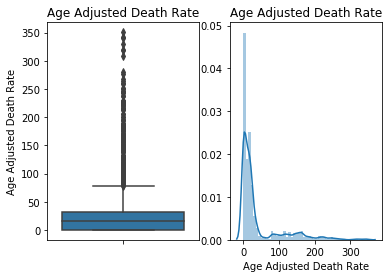

In [104]:
#Next I will recreate the charts above using Seaborn. 
#The code below is repurposed from the DAV 5400 Week 7 Lecture Notes
data = nycdeaths['Age Adjusted Death Rate']

#define a new figure for plotting
plt.figure(1)

#define the plot that will appear on the lefthand side of the subplot:
plt.subplot(121)

#define boxplot as the type of plot I want to appear
sns.boxplot(data, orient = 'v');

#give the plot a title
plt.title('Age Adjusted Death Rate')

#now define the subplot that will appear on the righthand side of our 1x2
plt.subplot(122)

#define histogram as the type of plot I want to appear
sns.distplot(data)

# give the plot a title
plt.title('Age Adjusted Death Rate')

#show results
plt.show();

### Exploratory Data Analysis - Age Adjusted Death Rate: Results
The summary statistics and graphs above show that the mean age adjusted death rate is 39.6 with a minimum of 0 and a maximum of 350. The distribution is skewed right and there appear to be a number of outliers. This distribution is even more compact than the death rate distribution.

## Part Four: Inference

Now that I have completed the Exploratory Data Analysis I will perform the analyses required to answer my research question. For any visualizations necessary, I will create the graphic using both Matplotlib and Seaborn. 

For ease of reference, the research question I posed above was:

**What is the leading cause of death in NYC and is this answer different depending on sex or race?**

First I will look at the total number of deaths over the entire time period for each leading cause of death. To do so I will create a new Data Frame containing only this information. 

In [106]:
#Create a new Data Frame with the unique causes of death and the sum of their number of deaths
DeathsFrame = nycdeaths.groupby('Leading Cause',as_index=False)['Deaths'].sum()

#Display first 30 rows to check data
DeathsFrame.head(30)

,Leading Cause,Deaths
0,"Accidents Except Drug Poisoning (V01-X39, X43,...",7467
1,All Other Causes,77999
2,Alzheimer's Disease (G30),2980
3,"Assault (Homicide: Y87.1, X85-Y09)",2102
4,Cerebrovascular Disease (Stroke: I60-I69),12941
5,Certain Conditions originating in the Perinata...,197
6,"Chronic Liver Disease and Cirrhosis (K70, K73)",1505
7,Chronic Lower Respiratory Diseases (J40-J47),13214
8,"Congenital Malformations, Deformations, and Ch...",22
9,Diabetes Mellitus (E10-E14),13794


Now that we have a dataFrame I will first sort it in descending order by total number of deaths and then plot this information in a barplot using both Matplotlib and Seaborn so that we can see the Leading Cause of Death over the entire period with the highest number of deaths. 

In [117]:
#Sort the Data Frame in descending order by total number of deaths to make the graphs easier to read
DeathsFrame_sorted = DeathsFrame.sort_values('Deaths',ascending=False)

#ensure that sorted function worked as expected.
DeathsFrame_sorted.head(20)

,Leading Cause,Deaths
10,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",147551
16,Malignant Neoplasms (Cancer: C00-C97),106367
1,All Other Causes,77999
14,Influenza (Flu) and Pneumonia (J09-J18),18678
9,Diabetes Mellitus (E10-E14),13794
7,Chronic Lower Respiratory Diseases (J40-J47),13214
4,Cerebrovascular Disease (Stroke: I60-I69),12941
0,"Accidents Except Drug Poisoning (V01-X39, X43,...",7467
11,Essential Hypertension and Renal Diseases (I10...,6955
12,Human Immunodeficiency Virus Disease (HIV: B20...,5436


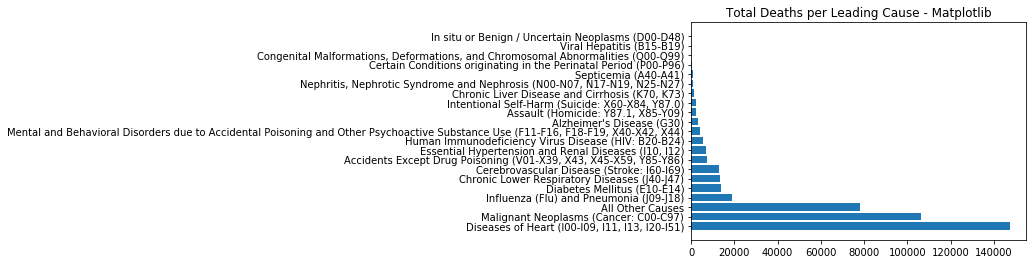

In [139]:
#Here I will create a barplot in Matplotlib for total number of deaths in the time frame given.
#define x and y variables to be used in the graph below
x = DeathsFrame_sorted['Leading Cause']
y = DeathsFrame_sorted['Deaths']

#define a new figure for plotting
plt.figure(1)


#define barplot as the type of plot I want to appear
plt.barh(x, y);

#give the plot a title
plt.title('Total Deaths per Leading Cause - Matplotlib')

#display results
plt.show()



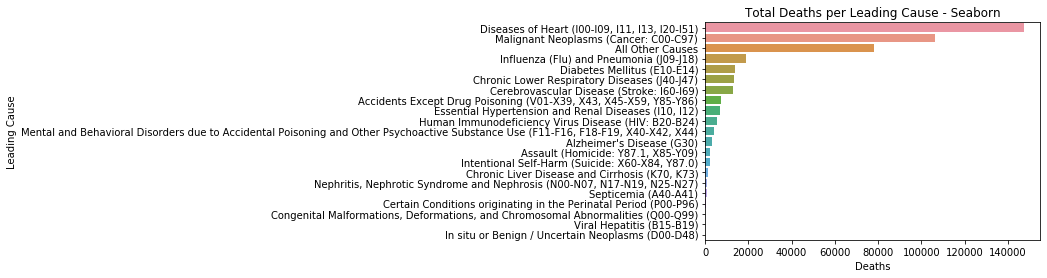

In [211]:
#now recreate this visualization using Seaborn
#define x and y variables to be used in the graph below
x = DeathsFrame_sorted['Leading Cause']
y = DeathsFrame_sorted['Deaths']

#define barplot as the type of plot I want to appear
sns.barplot(y,x)

#give the plot a title
plt.title('Total Deaths per Leading Cause - Seaborn')

#show results
plt.show();

### Inference - Total Deaths: Results

The results above show that the leading cause of death for all years, races and sexes combined is Diseases of Heart. 

Next I will look to see if that is true for all years or if the results are being skewed by something, such as an overly high number of deaths from heart disease in one year. 

To do so I will create a smaller data frame that looks at the median of each cause of death over the entire time frame to see if Diseases of Heart is still the leading cause of death. I will use median rather than mean as median helps avoid the effect of outliers more than a mean does.   

In [176]:
#create a data frame that contains median number of deaths per leading cause
avgdeathsperyear = nycdeaths.groupby('Leading Cause',as_index=False)['Deaths'].median()

#sort in descending order to make graphing easier
avgdeathsperyearsorted = avgdeathsperyear.sort_values('Deaths',ascending = False)

#display results to check
avgdeathsperyearsorted.head(15)

,Leading Cause,Deaths
10,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",877.5
16,Malignant Neoplasms (Cancer: C00-C97),813.0
1,All Other Causes,599.5
3,"Assault (Homicide: Y87.1, X85-Y09)",210.5
14,Influenza (Flu) and Pneumonia (J09-J18),194.5
9,Diabetes Mellitus (E10-E14),191.5
4,Cerebrovascular Disease (Stroke: I60-I69),154.0
7,Chronic Lower Respiratory Diseases (J40-J47),146.0
17,Mental and Behavioral Disorders due to Acciden...,135.0
11,Essential Hypertension and Renal Diseases (I10...,123.0


The data frame above shows that even when removing the effect of outliers, Diseases of Heart has the highest median number of deaths in NYC. This is further proof that Diseases of Heart is the leading cause of death in NYC.

Next we will create simple data frames that pull the highest median value for each sex and each race to see if Diseases of Heart is the leading cause of death for each sex and race as well. 

In [209]:
#create a new data frame that contains the median number of deaths for each leading cause of death per sex
sexdf = nycdeaths.groupby(['Sex','Leading Cause'])['Deaths'].median().reset_index()

#return only the row associated with the maximum median value of deaths per sex
sexdf.loc[sexdf.groupby(["Sex"])["Deaths"].idxmax()]

,Sex,Leading Cause,Deaths
9,Female,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",846.0
29,Male,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",877.5


The dataframe above shows us that Diseases of Heart is the leading cause of death for both women and men over the entire time frame of the data (2007 - 2014).

Next we will perform the same process on race to see if we get the same result. 

In [210]:
#create a new data frame that contains the median number of deaths for each leading cause of death per race ethnicity
racedf = nycdeaths.groupby(['Race Ethnicity','Leading Cause'])['Deaths'].median().reset_index()

#return only the row associated with the maximum median value of deaths per race ethnicity
racedf.loc[racedf.groupby(["Race Ethnicity"])["Deaths"].idxmax()]

,Race Ethnicity,Leading Cause,Deaths
13,Asian and Pacific Islander,Malignant Neoplasms (Cancer: C00-C97),487.5
24,Black Non-Hispanic,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",2157.5
40,Hispanic,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",1321.5
57,Not Stated/Unknown,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",93.0
75,Other Race/ Ethnicity,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",41.5
89,White Non-Hispanic,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",4867.5


Interestingly, the data frame above shows us that for every race studied, with the exception of Asian and Pacific Islanders, the leading cause of death in NYC is Diseases of Heart. For Asian and Pacific Islanders the leading cause of death is Malignant Neoplasms (Cancer). 

## Part 5: Conclusion

My research question as stated previously was:

**What is the leading cause of death in NYC and is this answer different depending on sex or race?**

As discovered in my analysis above, the leading cause of death in NYC over the time period of 2007 - 2014 was diseases of heart. This is true when looking at overall number of deaths (seen in Outputs 139 and 140), and when taking the median number of deaths per year for each cause (seen in Output 176). 

Diseases of Heart was also the leading cause of death for both men and women in NYC from 2007 - 2014 (shown in Output 209) and the leading cause of death in this period for every race *except for* Asian and Pacific Islanders (shown in Output 210).

After performing this analysis I conclude that the leading cause of death in NYC from 2007 - 2014 was Diseases of Heart for every sex and for all races *except for* Asian and Pacific Islanders. It would be an interesting point for medical researchers to study what the Asian and and Pacific Islander communities of NYC are doing that has been so effective in preventing as high of levels of fatalities from heart disease as the other races.  